# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

C:\Users\user\AppData\Local\Temp/ipykernel_9360/68838355.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('circuit.tif'))


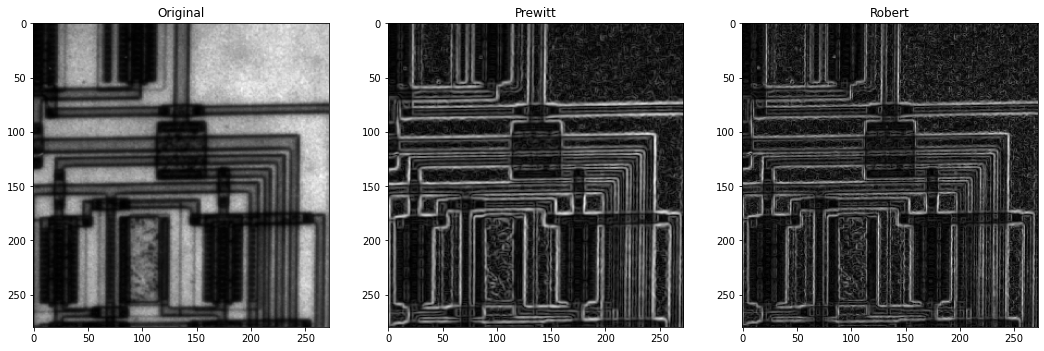

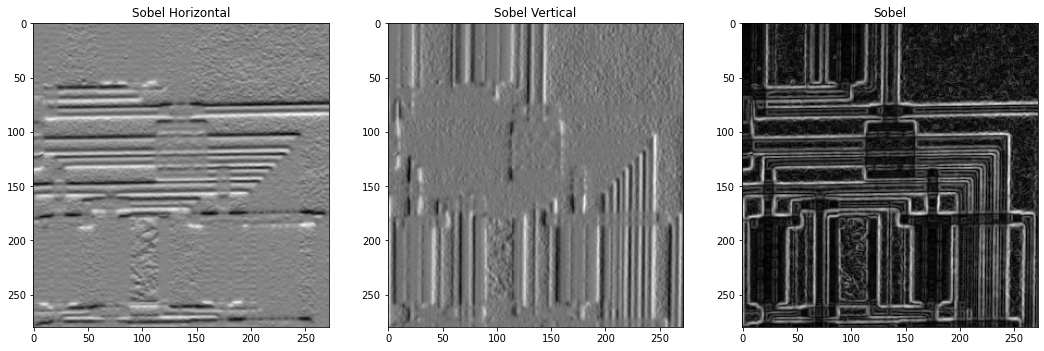

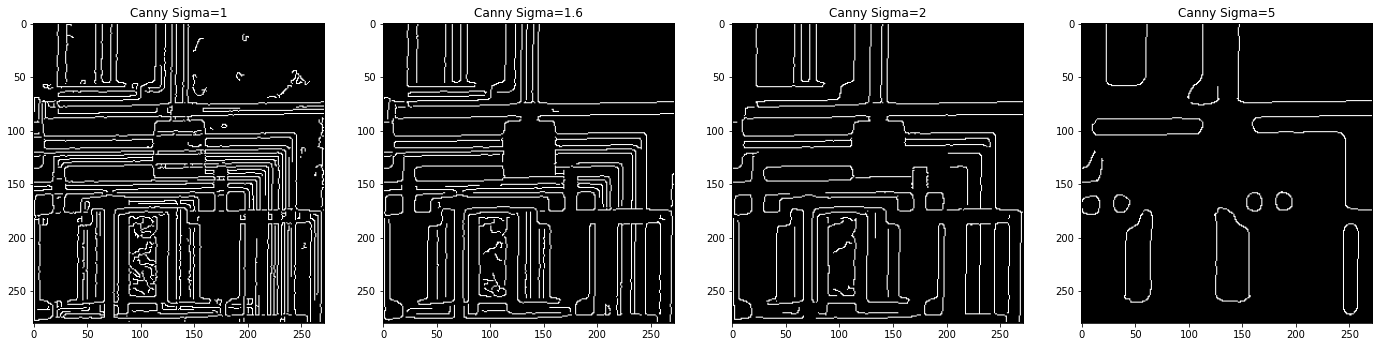

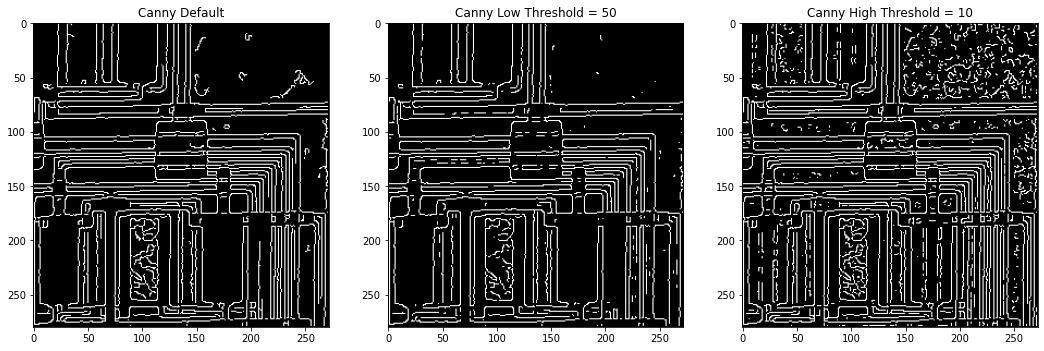

In [3]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('circuit.tif'))

prewittImg=prewitt(img)

robertsImg=roberts(img)

sobelHorImg=sobel_h(img)
sobelVerImg=sobel_v(img)
sobelImg=sobel(img)

cannyImgSig1=canny(img,sigma=1)
cannyImgSig1_6=canny(img,sigma=1.6)
cannyImgSig2=canny(img,sigma=2)
cannyImgSig3=canny(img,sigma=5)

cannyImg=canny(img)
cannyImgThresLow=canny(img,low_threshold=50)
cannyImgThresHigh=canny(img,high_threshold=10)

show_images([img,prewittImg,robertsImg],["Original","Prewitt","Robert"])
show_images([sobelHorImg,sobelVerImg,sobelImg],["Sobel Horizontal","Sobel Vertical","Sobel"])
show_images([cannyImgSig1,cannyImgSig1_6,cannyImgSig2,cannyImgSig3],["Canny Sigma=1","Canny Sigma=1.6","Canny Sigma=2","Canny Sigma=5"])
show_images([cannyImg,cannyImgThresLow,cannyImgThresHigh],["Canny Default","Canny Low Threshold = 50","Canny High Threshold = 10"])


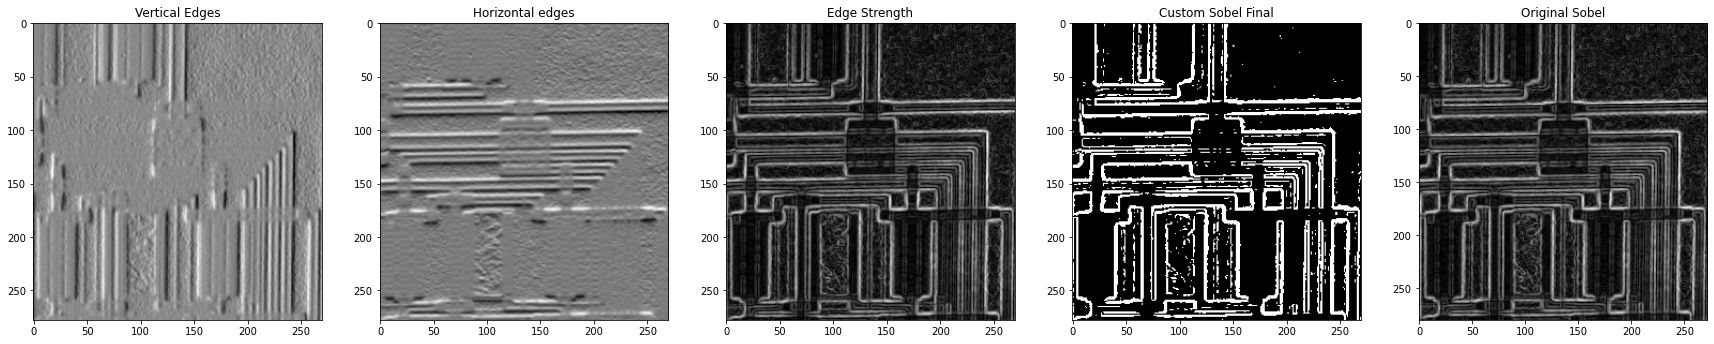

In [4]:
# 2. Custom Sobel (V-H-Both)

def customSobel(img,threshold):
    verticalFilter=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    horizontalFilter=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

    verticalEdges=convolve2d(img,verticalFilter,mode="valid")
    horizontalEdges=convolve2d(img,horizontalFilter,mode="valid")
    edgeStrength=np.sqrt((verticalEdges**2)+(horizontalEdges**2))

    finalImg=edgeStrength.copy()
    finalImg[ edgeStrength <= threshold] = 0
    finalImg[ edgeStrength > threshold] = 1
    show_images([verticalEdges,horizontalEdges,edgeStrength,finalImg,sobelImg],["Vertical Edges","Horizontal edges","Edge Strength","Custom Sobel Final","Original Sobel"])

customSobel(img,threshold=100)



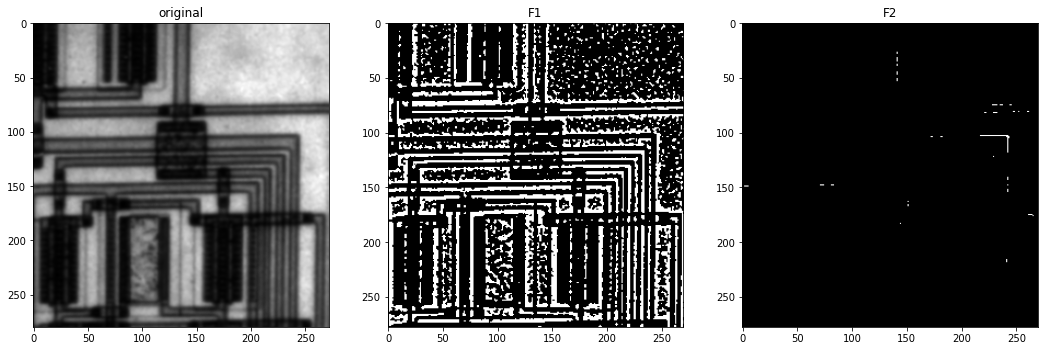

In [5]:
# 3. Custom LoG
thres1= 10
thres2= 10

def customLoG(img,threshold1, threshold2):
    img2 = img.copy()
    img=gaussian(img,sigma=1)
    img2=gaussian(img,sigma=1)
    filter1=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    filter2=np.array([[0,1,0],[1,-4,1],[0,1,0]])
    f1img=convolve2d(img,filter1,mode="valid")
    f2img=convolve2d(img2,filter2,mode="valid")
    f1img[f1img<=threshold1/255]=0
    # f1img[f1img<=threshold]=0
    f1img[f1img>threshold1/255]=1
    f2img[f2img<=threshold2/255]=0
    # f2img[f2img<=threshold]=0
    f2img[f2img>threshold2/255]=1
    show_images([img,f1img,f2img],["original","F1","F2"])

customLoG(img,threshold1=thres1,threshold2=thres2)



In [6]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'